In [0]:
import numpy as np
import matplotlib.pyplot as plt
def func(x):
  return x + 2*np.sin(1.5*x)

 

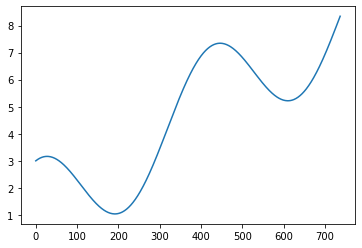

In [0]:
t=((2*np.pi)/(1.5*1000))*2000
x=np.arange(1,t,0.01)
f=func(x)
plt.plot(f)
l=len(x)


In [0]:
def hypothesis(f,x,n):
  theta=np.zeros((n,1))  
  theta=np.matmul(np.matmul(np.linalg.inv(np.matmul(x.T, x)),x.T),f)
  eqn=np.matmul(x, theta.T)
  return eqn

In [0]:
x=np.matrix(x)
x=x.T
o=np.ones((l,1))
print(o.shape)
print(x.shape)

(738, 1)
(738, 1)


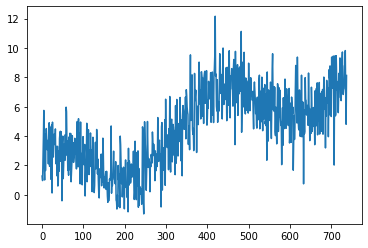

In [0]:
from sklearn.metrics import mean_squared_error
import statistics 
  
degree=2
X=np.column_stack((o,x))
n=np.random.normal(0,np.sqrt(2),l)
y=f+n
plt.plot(y)
f_cap=hypothesis(f,X,2)
f_cap=f_cap.T
for i in range(1,1000):
  n=np.random.normal(0,np.sqrt(2),l)
  y=f+n
  eqn=hypothesis(y,X,degree)
  eqn=eqn.T
  f_cap=np.row_stack((f_cap,eqn))
#print(f_cap.shape)

[[ 1.47667277  1.48042189  1.48372172  1.48657193  1.4889723   1.4909227
   1.49242311  1.49347362  1.4940744   1.49422573  1.493928    1.49318168
   1.49198737  1.49034575  1.48825761  1.48572382  1.48274538  1.47932338
   1.475459    1.47115353  1.46640834  1.46122494  1.45560489  1.44954989
   1.44306171  1.43614222  1.4287934   1.42101732  1.41281614  1.40419214
   1.39514765  1.38568515  1.37580716  1.36551634  1.35481541  1.34370719
   1.33219461  1.32028067  1.30796846  1.29526118  1.2821621   1.26867458
   1.25480207  1.24054812  1.22591634  1.21091045  1.19553424  1.17979157
   1.16368642  1.14722283  1.1304049   1.11323685  1.09572295  1.07786756
   1.05967512  1.04115013  1.02229718  1.00312092  0.9836261   0.9638175
   0.94370001  0.92327857  0.90255818  0.88154393  0.86024097  0.83865449
   0.81678978  0.79465217  0.77224706  0.74957991  0.72665623  0.70348159
   0.68006163  0.65640204  0.63250855  0.60838696  0.58404311  0.55948289
   0.53471224  0.50973717  0.48456369  0

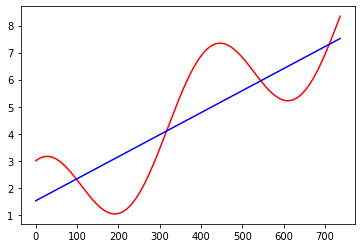

In [0]:
expected_func=[]
for i in range(l):
  m=np.mean(f_cap[:,i])
  expected_func.append(m)
expected_func=np.matrix(expected_func)
bias=f-expected_func
bias_sq=np.dot(np.transpose(bias),bias)
expected_func=expected_func.T
expected_func = np.squeeze(np.asarray(expected_func))
f=np.squeeze(np.asarray(f))
mse=mean_squared_error(f, expected_func)
var=statistics.variance(expected_func)
print(bias)
print(var)
print(mse)
plt.plot(f,'r')
plt.plot(expected_func,'b')


In [0]:
degree=4
temp1=np.column_stack((o,x))
t=np.multiply(x,x)
temp2=np.column_stack((temp1,t))
X_c=np.column_stack((temp2,np.multiply(t,x)))
f_cap_c=hypothesis(f,X_c,degree)
f_cap_c=f_cap_c.T
for i in range(1,1000):
  n=np.random.normal(0,np.sqrt(2),l)
  y=f+n
  eqn_c=hypothesis(y,X_c,degree)
  eqn_c=eqn_c.T
  f_cap_c=np.row_stack((f_cap_c,eqn_c))
f_cap.shape

(1000, 738)

3.5736791387506486
1.271199035470318


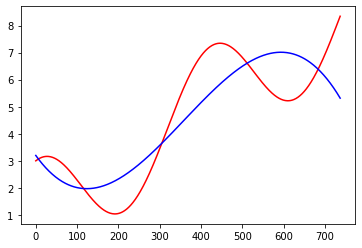

In [0]:
expected_func_c=[]
for i in range(l):
  m_c=np.mean(f_cap_c[:,i])
  expected_func_c.append(m_c)
expected_func_c=np.matrix(expected_func_c)
bias_c=f-expected_func_c



expected_func_c=expected_func_c.T
expected_func_c = np.squeeze(np.asarray(expected_func_c))
#f=np.squeeze(np.asarray(f))
mse_c=mean_squared_error(f, expected_func_c)
var_c=statistics.variance(expected_func_c)

print(var_c)
print(mse_c)
plt.plot(f,'r')
plt.plot(expected_func_c,'b')